In [117]:
import requests
import json
from bs4 import BeautifulSoup as bs
import pandas as pd
from collections import Counter
import os

In [10]:
dates = pd.date_range('20220101','20221231')

for date in dates:
    date_ref=str(date)[:11].replace('-','')
    url = 'http://apis.data.go.kr/B552115/PvAmountByLocHr/getPvAmountByLocHr?serviceKey=YFmObBb3MEHK4j4pzikxX6A4cRpfZB2sUyZ1np0wcUdPPthaA2NhEDniH%2FCH6EaSkKppUO6A%2B6J9nvBu9FhEuA%3D%3D&pageNo=1&numOfRows=500&dataType=json&tradeYmd='+date_ref
    json_obj=json.loads(requests.get(url).text)
    print(requests.get(url).json())
    print(url)
    # print(json_obj)
    break

{'response': {'header': {'resultCode': '00', 'resultMsg': 'OK'}, 'body': {'dataType': 'JSON', 'totalCount': '0', 'numOfRows': '500', 'pageNo': '1', 'items': {'item': []}}}}
http://apis.data.go.kr/B552115/PvAmountByLocHr/getPvAmountByLocHr?serviceKey=YFmObBb3MEHK4j4pzikxX6A4cRpfZB2sUyZ1np0wcUdPPthaA2NhEDniH%2FCH6EaSkKppUO6A%2B6J9nvBu9FhEuA%3D%3D&pageNo=1&numOfRows=500&dataType=json&tradeYmd=20220101 


In [11]:
url = 'https://api.odcloud.kr/api/15065269/v1/uddi:2d675f57-b442-497b-a973-e35746c338b7?page=1&perPage=10&serviceKey=3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D'
print(url)

https://api.odcloud.kr/api/15065269/v1/uddi:2d675f57-b442-497b-a973-e35746c338b7?page=1&perPage=10&serviceKey=3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D


In [ ]:
key = #개인인증키
dates = pd.date_range('20210101','20211231')
dates = dates.astype('str').str.replace('-','')
for date in tqdm(dates):
    try:
        url = 'http://apis.data.go.kr/B552115/PvAmountByLocHr/getPvAmountByLocHr?serviceKey='+key+'&pageNo=1&numOfRows=500&dataType=json&tradeYmd='+date
        html = requests.get(url)
        soup=bs(html.text,'html.parser')
        json_obj=json.loads(soup.text)
        items= pd.DataFrame(json_obj['response']['body']['items']['item'])
        os.makedirs(f'./{date}',exist_ok=True)
        items.to_csv(f'./{date}/{date}.csv')
    except Exception as e:
        print(e)
        pass

In [52]:
# f = open('./한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv', 'r')
df_sola = pd.read_csv('./한국전력거래소_지역별 시간별 태양광 발전량_20211231.csv', encoding='cp949')

In [53]:
df_sola

,거래일자,거래시간,지역,발전량
0,2018-01-01,1,강원도,13.680
1,2018-01-01,2,강원도,0.000
2,2018-01-01,3,강원도,14.400
3,2018-01-01,4,강원도,0.000
4,2018-01-01,5,강원도,0.000
...,...,...,...,...
596083,2021-12-31,20,충청북도,47668.337
596084,2021-12-31,21,충청북도,41720.571
596085,2021-12-31,22,충청북도,23464.794
596086,2021-12-31,23,충청북도,8098.187


In [21]:
key = '3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D'
startDt = '20180101'
endDt = '20181231'
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='+key+'&pageNo=1&numOfRows=10&dataType=json&dataCd=ASOS&dateCd=DAY&startDt='+startDt+'&endDt='+endDt+'&stnIds=108'
# print(url)

In [22]:
html = requests.get(url)
soup=bs(html.text,'html.parser')
json_obj=json.loads(soup.text)

In [23]:
print(json_obj)

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'stnId': '108', 'stnNm': '서울', 'tm': '2018-01-01', 'avgTa': '-1.3', 'minTa': '-5.1', 'minTaHrmt': '0739', 'maxTa': '3.8', 'maxTaHrmt': '1538', 'mi10MaxRn': '', 'mi10MaxRnHrmt': '', 'hr1MaxRn': '', 'hr1MaxRnHrmt': '', 'sumRnDur': '', 'sumRn': '', 'maxInsWs': '7.0', 'maxInsWsWd': '320', 'maxInsWsHrmt': '1633', 'maxWs': '3.8', 'maxWsWd': '290', 'maxWsHrmt': '1634', 'avgWs': '1.4', 'hr24SumRws': '1188', 'maxWd': '290', 'avgTd': '-13.9', 'minRhm': '19', 'minRhmHrmt': '1203', 'avgRhm': '39.1', 'avgPv': '2.1', 'avgPa': '1016.8', 'maxPs': '1029.0', 'maxPsHrmt': '1058', 'minPs': '1025.9', 'minPsHrmt': '0111', 'avgPs': '1027.8', 'ssDur': '9.6', 'sumSsHr': '8.3', 'hr1MaxIcsrHrmt': '1200', 'hr1MaxIcsr': '1.1', 'sumGsr': '6.14', 'ddMefs': '', 'ddMefsHrmt': '', 'ddMes': '', 'ddMesHrmt': '', 'sumDpthFhsc': '', 'avgTca': '1.0', 'avgLmac': '0.9', 'avgTs': '-1.7', 'minTg': '-11.5

In [24]:
df = pd.DataFrame(json_obj['response']['body']['items']['item'])

In [25]:
df

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,108,서울,2018-01-01,-1.3,-5.1,0739,3.8,1538,,,...,2.7,5.9,9.0,15.5,17.6,1.1,1.6,,,
1,108,서울,2018-01-02,-1.8,-4.3,2348,1.8,1345,,,...,2.7,5.8,8.9,15.4,17.6,1.3,1.9,,{달무리}2330-,
2,108,서울,2018-01-03,-4.7,-7.1,0804,-0.4,1550,,,...,2.6,5.7,8.9,15.3,17.5,1.0,1.5,,-{달무리}-0050.,
3,108,서울,2018-01-04,-4.7,-8.7,0751,-0.7,1519,,,...,2.6,5.6,8.7,15.2,17.5,0.8,1.1,,{채운}0955-1015. {햇무리}1035-1110. {햇무리}1235-1425.,
4,108,서울,2018-01-05,-3.0,-5.6,0306,1.6,1530,,,...,2.6,5.5,8.7,15.1,17.5,0.9,1.3,,{햇무리}0920-0950.,
5,108,서울,2018-01-06,-2.8,-6.8,0628,2.9,1539,,,...,2.5,5.5,8.6,15.0,17.4,1.1,1.5,,,
6,108,서울,2018-01-07,-0.8,-5.7,0524,2.8,1501,,,...,2.5,5.4,8.5,14.9,17.4,0.8,1.1,0.0,,
7,108,서울,2018-01-08,1.3,-1.2,2352,4.0,1507,,,...,2.5,5.4,8.4,14.9,17.3,0.9,1.3,0.9,{눈}0535-0550. {연무}0925-1010. {눈}1715-{눈}{강도0}1...,
8,108,서울,2018-01-09,-4.2,-6.1,0837,-1.2,0001,,,...,2.4,5.3,8.3,14.8,17.3,0.7,1.1,0.8,-{연무}-0005. {눈}0055-0125. {눈}1445-{눈}{강도0}1500...,
9,108,서울,2018-01-10,-7.5,-10.3,2335,-4.8,1412,,,...,2.4,5.3,8.3,14.6,17.3,0.9,1.4,,-{눈}-0205.,


0    서울
1    서울
2    서울
3    서울
4    서울
5    서울
6    서울
7    서울
8    서울
9    서울
Name: stnNm, dtype: object

In [30]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import pandas as pd

In [34]:
search = '춘천기상대'
url = 'https://www.google.co.kr/maps/place/'+search+'/data=!3m1!4b1!4m5!3m4!1s0x3561e4fc0af0db6f:0xbab1b23ac7d3a32f!8m2!3d37.8051122!4d128.8548214?hl=ko'
print(url)

https://www.google.co.kr/maps/place/춘천기상대/data=!3m1!4b1!4m5!3m4!1s0x3561e4fc0af0db6f:0xbab1b23ac7d3a32f!8m2!3d37.8051122!4d128.8548214?hl=ko


In [42]:
driver=webdriver.Chrome('./chromedriver.exe')
driver.get(url)
time.sleep(2)




#새로운 검색어 입력
elem=driver.find_element(By.XPATH,'//*[@id="searchboxinput"]')
elem.clear()#기존 텍스트 삭제
elem.send_keys(search_ls['90'])
# elem.send_keys(Keys.ENTER)
time.sleep(1)
elem.click()

elem=driver.find_element(By.XPATH,'//*[@id="sbse0x0"]/span[5]/span')
print(elem.text)


# #3페이지까지 페이지 소스 가져오기
# pages=3
# for page in range(2,pages+1):
#     driver.find_element(By.LINK_TEXT,str(page)).click()
#     time.sleep(2)
#     tmp=driver.page_source
#     res.append(bs(tmp))
    
driver.quit()





# html=driver.page_source

#driver.close()
#driver.quit()

C:\Users\user\AppData\Local\Temp\ipykernel_17356\4135834806.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver.exe')


강원도


'<html lang="ko"><head>\n    <title>검색 - 네이버 지도</title>\n    <meta charset="utf-8">\n    <meta name="Referrer" content="origin">\n    <meta http-equiv="Content-Script-Type" content="text/javascript">\n    <meta http-equiv="Content-Style-Type" content="text/css">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0">\n    <meta name="format-detection" content="telephone=no">\n    <meta name="description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요.">\n    <meta name="google-site-verification" content="AO_6MCsaxSfiydw-JSF8cCpFrYPwZDiEo40pMwIwl7Q">\n\n    <meta property="og:type" content="website">\n    <meta property="og:site_name" content="네이버 지도">\n    <meta property="og:title" content="네이버 지도">\n    <meta property="og:image" content="https://map.pstatic.net/res/file/content/global/static/naver/og_map.png">\n    <meta property="og
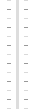
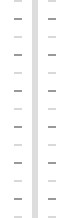
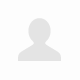
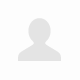

In [32]:
html

In [ ]:
soup=bs(html,'html.parser')




tbody=soup.find('tbody')
tr_tags=tbody.find_all('tr')
res=[]
for tr in tr_tags:
    rank=tr.find('span','rank').text
    title=tr.find('div','ellipsis rank01').find('a').text
    artist=tr.find('div','ellipsis rank02').find('a').text
    album=tr.find('div','ellipsis rank03').find('a').text
    like_cnt=tr.find('span','cnt').text.replace('\n총건수\n','')
    res.append([rank, title,artist,album,like_cnt])
    
df=pd.DataFrame(res,columns=['순위','곡제목','가수명','앨범','좋아요수'])
display(df)

In [39]:
search_ls = {
'90':'속초','212':'홍천',
'93':'북춘천','216':'태백',
'95':'철원','217':'정선군',
'98':'동두천','221':'제천',
'99':'파주','226':'보은',
'100':'대관령','232':'천안',
'101':'춘천','235':'보령',
'102':'백령도','236':'부여',
'104':'북강릉','238':'금산',
'105':'강릉','239':'세종',
'106':'동해','243':'부안',
'108':'서울','244':'임실',
'112':'인천','245':'정읍',
'114':'원주','247':'남원',
'115':'울릉도','248':'장수',
    
'119':'수원','251':'고창군',
'121':'영월','252':'영광군',
'127':'충주','253':'김해시',
'129':'서산','254':'순창군',
'130':'울진','255':'북창원',
'131':'청주','257':'양산시',
'133':'대전','258':'보성군',
'135':'추풍령','259':'강진군',
'136':'안동','260':'장흥',
'137':'상주','261':'해남',
'138':'포항','262':'고흥',
'140':'군산','263':'의령군',
'143':'대구','264':'함양군',
'146':'전주','266':'광양시',
'152':'울산','268':'진도군',
'155':'창원','271':'봉화',
'156':'광주','272':'영주',
'159':'부산','273':'문경',

'162':'통영','276':'청송군',
'165':'목포','277':'영덕',
'168':'여수','278':'의성',
'169':'흑산도','279':'구미',
'170':'완도','281':'영천',
'172':'고창','283':'경주시',
'174':'순천','284':'거창',
'177':'홍성','285':'합천',
'184':'제주','288':'밀양',
'185':'고산','289':'산청',
'188':'성산','294':'거제',
'189':'서귀포','295':'남해',
'192':'진주',
'201':'강화',
'202':'양평',
'203':'이천',
'211':'인제',
}

In [41]:
search_ls['90']

'속초'

In [43]:
search_ls.keys()

dict_keys(['90', '212', '93', '216', '95', '217', '98', '221', '99', '226', '100', '232', '101', '235', '102', '236', '104', '238', '105', '239', '106', '243', '108', '244', '112', '245', '114', '247', '115', '248', '119', '251', '121', '252', '127', '253', '129', '254', '130', '255', '131', '257', '133', '258', '135', '259', '136', '260', '137', '261', '138', '262', '140', '263', '143', '264', '146', '266', '152', '268', '155', '271', '156', '272', '159', '273', '162', '276', '165', '277', '168', '278', '169', '279', '170', '281', '172', '283', '174', '284', '177', '285', '184', '288', '185', '289', '188', '294', '189', '295', '192', '201', '202', '203', '211'])

In [48]:
driver=webdriver.Chrome('./chromedriver.exe')
driver.get(url)
time.sleep(2)

res = []
for i in search_ls.keys():
    #새로운 검색어 입력
    elem=driver.find_element(By.XPATH,'//*[@id="searchboxinput"]')
    elem.clear()
    elem.send_keys(search_ls[i])
    time.sleep(1)
    elem.click()

    elem=driver.find_element(By.CSS_SELECTOR,'#sbsg50 > div:nth-child(1) > div:nth-child(1)')
    #print(elem.text)
    res.append(elem.text)

    
driver.quit()



C:\Users\user\AppData\Local\Temp\ipykernel_17356\514265769.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('./chromedriver.exe')


In [49]:
res

['속초 강원도',
 '홍천 강원도',
 '북춘천',
 '태백 강원도',
 '철원 강원도',
 '정선군 강원도',
 '동두천 경기도',
 '제천 충청북도',
 '파주 경기도',
 '보은 충청북도',
 '대관령 강릉시',
 '천안 충청남도',
 '춘천 강원도',
 '보령 충청남도',
 '백령도 인천광역시',
 '부여 충청남도',
 '북강릉주차장 - 평창올림픽 셔틀버스 강원도 강릉시 사천면 방동리',
 '금산 충청남도',
 '강릉 강원도',
 '세종문화회관 서울특별시 종로구 세종대로',
 '동해 강원도',
 '부안 전라북도',
 '서울',
 '임실 전라북도',
 '인천',
 '정읍 전라북도',
 '원주 강원도',
 '남원 전라북도',
 '울릉도 울릉군',
 '장수군 전라북도',
 '수원 경기도',
 '고창군 전라북도',
 '영월 강원도',
 '영광군 전라남도',
 '충주 충청북도',
 '김해시장',
 '서산 충청남도',
 '순창군 전라북도',
 '울진 경상북도',
 '북창원IC',
 '청주 충청북도',
 '양산시 경상남도',
 '대전',
 '보성군 전라남도',
 '추풍령감자탕 까치산역점 서울특별시 강서구 화곡동',
 '강진군 전라남도',
 '안동 경상북도',
 '장흥 전라남도',
 '상주 경상북도',
 '해남 전라남도',
 '포항 경상북도',
 '고흥 전라남도',
 '군산 전라북도',
 '의령군 경상남도',
 '대구',
 '함양군 경상남도',
 '전주 전라북도',
 '광양시 전라남도',
 '울산',
 '진도군 전라남도',
 '창원',
 '봉화군 경상북도',
 '광주 경기도',
 '영주 경상북도',
 '부산',
 '문경 경상북도',
 '통영 경상남도',
 '청송군 경상북도',
 '목포 전라남도',
 '영덕 경상북도',
 '여수 전라남도',
 '의성 경상북도',
 '흑산도 신안군',
 '구미 경상북도',
 '완도 전라남도',
 '영천 경상북도',
 '고창 전라북도',
 '경주시 경상북도',
 '순천 전라남도',
 '거창 경상남도',
 '홍성 충청남도',
 '합천 경상

In [50]:
len(search_ls)

95

In [51]:
len(res)

95

In [66]:
result = [
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '경기도',
 '충청북도',
 '경기도',
 '충청북도',
 '강원도',
 '충청남도',
 '강원도',
 '충청남도',
 '인천시',
 '충청남도',
 '강원도',
 '충청남도',
 '강원도',
 '대전시',
 '강원도',
 '전라북도',
 '서울시',
 '전라북도',
 '인천시',
 '전라북도',
 '강원도',
 '전라북도',
 '대구시',
 '전라북도',
 '경기도',
 '전라북도',
 '강원도',
 '전라남도',
 '충청북도',
 '김해시',
 '충청남도',
 '전라북도',
 '경상북도',
 '경상남도',
 '충청북도',
 '경상남도',
 '대전시',
 '전라남도',
 '충청북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '전라북도',
 '경상남도',
 '대구시',
 '경상남도',
 '전라북도',
 '전라남도',
 '울산시',
 '전라남도',
 '경상남도',
 '경상북도',
 '경기도',
 '경상북도',
 '부산시',
 '경상북도',
 '경상남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라북도',
 '경상북도',
 '전라남도',
 '경상남도',
 '충청남도',
 '경상남도',
 '제주도',
 '경상남도',
 '제주도',
 '경상남도',
 '제주도',
 '부산시',
 '제주도',
 '경상남도',
 '경상남도',
 '인천시',
 '경기도',
 '경기도',
 '강원도'
]

In [55]:
df_sola['지역'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주시', '대구시', '대전시', '부산시', '서울시',
       '세종시', '울산시', '인천시', '전라남도', '전라북도', '제주도', '충청남도', '충청북도'],
      dtype=object)

In [67]:
result1 = []
for i in range(len(search_ls)):
    result1.append({list(search_ls.keys())[i]: result[i]})

In [68]:
result1

[{'90': '강원도'},
 {'212': '강원도'},
 {'93': '강원도'},
 {'216': '강원도'},
 {'95': '강원도'},
 {'217': '강원도'},
 {'98': '경기도'},
 {'221': '충청북도'},
 {'99': '경기도'},
 {'226': '충청북도'},
 {'100': '강원도'},
 {'232': '충청남도'},
 {'101': '강원도'},
 {'235': '충청남도'},
 {'102': '인천시'},
 {'236': '충청남도'},
 {'104': '강원도'},
 {'238': '충청남도'},
 {'105': '강원도'},
 {'239': '대전시'},
 {'106': '강원도'},
 {'243': '전라북도'},
 {'108': '서울시'},
 {'244': '전라북도'},
 {'112': '인천시'},
 {'245': '전라북도'},
 {'114': '강원도'},
 {'247': '전라북도'},
 {'115': '대구시'},
 {'248': '전라북도'},
 {'119': '경기도'},
 {'251': '전라북도'},
 {'121': '강원도'},
 {'252': '전라남도'},
 {'127': '충청북도'},
 {'253': '김해시'},
 {'129': '충청남도'},
 {'254': '전라북도'},
 {'130': '경상북도'},
 {'255': '경상남도'},
 {'131': '충청북도'},
 {'257': '경상남도'},
 {'133': '대전시'},
 {'258': '전라남도'},
 {'135': '충청북도'},
 {'259': '전라남도'},
 {'136': '경상북도'},
 {'260': '전라남도'},
 {'137': '경상북도'},
 {'261': '전라남도'},
 {'138': '경상북도'},
 {'262': '전라남도'},
 {'140': '전라북도'},
 {'263': '경상남도'},
 {'143': '대구시'},
 {'264': '경상남도'},
 {'146': '전라북도'},
 {'

In [69]:
result1[0]

{'90': '강원도'}

In [70]:
len(result1)

95

In [71]:
search_ls['108']

'서울'

In [83]:
code = list(search_ls.keys())

In [82]:
name = result

In [81]:
student_card = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns = ['a', 'b', 'c'], dtype = float)   #data type 지정
student_card

,a,b,c
0,1.0,2.0,3.0
1,4.0,5.0,6.0


In [86]:
name

['강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '강원도',
 '경기도',
 '충청북도',
 '경기도',
 '충청북도',
 '강원도',
 '충청남도',
 '강원도',
 '충청남도',
 '인천시',
 '충청남도',
 '강원도',
 '충청남도',
 '강원도',
 '대전시',
 '강원도',
 '전라북도',
 '서울시',
 '전라북도',
 '인천시',
 '전라북도',
 '강원도',
 '전라북도',
 '대구시',
 '전라북도',
 '경기도',
 '전라북도',
 '강원도',
 '전라남도',
 '충청북도',
 '김해시',
 '충청남도',
 '전라북도',
 '경상북도',
 '경상남도',
 '충청북도',
 '경상남도',
 '대전시',
 '전라남도',
 '충청북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '전라북도',
 '경상남도',
 '대구시',
 '경상남도',
 '전라북도',
 '전라남도',
 '울산시',
 '전라남도',
 '경상남도',
 '경상북도',
 '경기도',
 '경상북도',
 '부산시',
 '경상북도',
 '경상남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라남도',
 '경상북도',
 '전라북도',
 '경상북도',
 '전라남도',
 '경상남도',
 '충청남도',
 '경상남도',
 '제주도',
 '경상남도',
 '제주도',
 '경상남도',
 '제주도',
 '부산시',
 '제주도',
 '경상남도',
 '경상남도',
 '인천시',
 '경기도',
 '경기도',
 '강원도']

# 여기부터

In [90]:
df_res = pd.DataFrame({'지역코드': code, '지역명': name})   #data type 지정
df_res

,지역코드,지역명
0,90,강원도
1,212,강원도
2,93,강원도
3,216,강원도
4,95,강원도
...,...,...
90,192,경상남도
91,201,인천시
92,202,경기도
93,203,경기도


In [100]:
key = '3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D'
startDt = '20180101'
endDt = '20181231'
numOfRows = str(10)
url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='+key+'&pageNo=1&numOfRows='+numOfRows+'&dataType=json&dataCd=ASOS&dateCd=DAY&startDt='+startDt+'&endDt='+endDt+'&stnIds=108'
# print(url)

html = requests.get(url)
soup=bs(html.text,'html.parser')
json_obj=json.loads(soup.text)
df = pd.DataFrame(json_obj['response']['body']['items']['item'])

display(df)

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,108,서울,2018-01-01,-1.3,-5.1,0739,3.8,1538,,,...,2.7,5.9,9.0,15.5,17.6,1.1,1.6,,,
1,108,서울,2018-01-02,-1.8,-4.3,2348,1.8,1345,,,...,2.7,5.8,8.9,15.4,17.6,1.3,1.9,,{달무리}2330-,
2,108,서울,2018-01-03,-4.7,-7.1,0804,-0.4,1550,,,...,2.6,5.7,8.9,15.3,17.5,1.0,1.5,,-{달무리}-0050.,
3,108,서울,2018-01-04,-4.7,-8.7,0751,-0.7,1519,,,...,2.6,5.6,8.7,15.2,17.5,0.8,1.1,,{채운}0955-1015. {햇무리}1035-1110. {햇무리}1235-1425.,
4,108,서울,2018-01-05,-3.0,-5.6,0306,1.6,1530,,,...,2.6,5.5,8.7,15.1,17.5,0.9,1.3,,{햇무리}0920-0950.,
5,108,서울,2018-01-06,-2.8,-6.8,0628,2.9,1539,,,...,2.5,5.5,8.6,15.0,17.4,1.1,1.5,,,
6,108,서울,2018-01-07,-0.8,-5.7,0524,2.8,1501,,,...,2.5,5.4,8.5,14.9,17.4,0.8,1.1,0.0,,
7,108,서울,2018-01-08,1.3,-1.2,2352,4.0,1507,,,...,2.5,5.4,8.4,14.9,17.3,0.9,1.3,0.9,{눈}0535-0550. {연무}0925-1010. {눈}1715-{눈}{강도0}1...,
8,108,서울,2018-01-09,-4.2,-6.1,0837,-1.2,0001,,,...,2.4,5.3,8.3,14.8,17.3,0.7,1.1,0.8,-{연무}-0005. {눈}0055-0125. {눈}1445-{눈}{강도0}1500...,
9,108,서울,2018-01-10,-7.5,-10.3,2335,-4.8,1412,,,...,2.4,5.3,8.3,14.6,17.3,0.9,1.4,,-{눈}-0205.,


In [92]:
df.dtypes

stnId        object
stnNm        object
tm           object
avgTa        object
minTa        object
              ...  
sumLrgEv     object
sumSmlEv     object
n99Rn        object
iscs         object
sumFogDur    object
Length: 62, dtype: object

In [93]:
tmp = {'108': '서울시'}
df['stnId'].map(tmp)

0    서울시
1    서울시
2    서울시
3    서울시
4    서울시
5    서울시
6    서울시
7    서울시
8    서울시
9    서울시
Name: stnId, dtype: object

In [95]:
from collections import Counter

In [96]:
Counter(result)

Counter({'강원도': 14,
         '경기도': 6,
         '충청북도': 5,
         '충청남도': 6,
         '인천시': 3,
         '대전시': 2,
         '전라북도': 10,
         '서울시': 1,
         '대구시': 2,
         '전라남도': 13,
         '김해시': 1,
         '경상북도': 13,
         '경상남도': 12,
         '울산시': 1,
         '부산시': 2,
         '제주도': 4})

In [97]:
dict_res = dict(zip(code, name))

In [98]:
dict_res

{'90': '강원도',
 '212': '강원도',
 '93': '강원도',
 '216': '강원도',
 '95': '강원도',
 '217': '강원도',
 '98': '경기도',
 '221': '충청북도',
 '99': '경기도',
 '226': '충청북도',
 '100': '강원도',
 '232': '충청남도',
 '101': '강원도',
 '235': '충청남도',
 '102': '인천시',
 '236': '충청남도',
 '104': '강원도',
 '238': '충청남도',
 '105': '강원도',
 '239': '대전시',
 '106': '강원도',
 '243': '전라북도',
 '108': '서울시',
 '244': '전라북도',
 '112': '인천시',
 '245': '전라북도',
 '114': '강원도',
 '247': '전라북도',
 '115': '대구시',
 '248': '전라북도',
 '119': '경기도',
 '251': '전라북도',
 '121': '강원도',
 '252': '전라남도',
 '127': '충청북도',
 '253': '김해시',
 '129': '충청남도',
 '254': '전라북도',
 '130': '경상북도',
 '255': '경상남도',
 '131': '충청북도',
 '257': '경상남도',
 '133': '대전시',
 '258': '전라남도',
 '135': '충청북도',
 '259': '전라남도',
 '136': '경상북도',
 '260': '전라남도',
 '137': '경상북도',
 '261': '전라남도',
 '138': '경상북도',
 '262': '전라남도',
 '140': '전라북도',
 '263': '경상남도',
 '143': '대구시',
 '264': '경상남도',
 '146': '전라북도',
 '266': '전라남도',
 '152': '울산시',
 '268': '전라남도',
 '155': '경상남도',
 '271': '경상북도',
 '156': '경기도',
 '272': '경상북도',
 '159':

# 기상청 전국 데이터 추출

In [132]:
key = '3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D'
startDt = '20210101'
endDt = '20211231'
numOfRows = str()
url1 = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='+key+'&pageNo=1&numOfRows='+numOfRows+'&dataType=json&dataCd=ASOS&dateCd=DAY&startDt='+startDt+'&endDt='+endDt+'&stnIds=90'
# print(url)

html = requests.get(url1)
soup=bs(html.text,'html.parser')
json_obj=json.loads(soup.text)
df_day = pd.DataFrame(json_obj['response']['body']['items']['item'])

display(df_day)

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,90,속초,2021-01-01,-2.9,-7.7,0441,1.2,1456,,,...,,,,,,,,,,
1,90,속초,2021-01-02,-2.5,-6.3,0754,1.5,1436,,,...,,,,,,,,,,
2,90,속초,2021-01-03,-2.5,-5.8,0648,0.7,1443,,,...,,,,,,,,,,
3,90,속초,2021-01-04,-0.9,-4.2,0646,3.2,1445,,,...,,,,,,,,,,
4,90,속초,2021-01-05,-3.2,-7.3,2337,0.1,1429,,,...,,,,,,,,,,
5,90,속초,2021-01-06,-5.9,-9.4,0538,-2.2,1345,,,...,,,,,,,,,,
6,90,속초,2021-01-07,-12.1,-14.8,0803,-5.9,0138,,,...,,,,,,,,,,
7,90,속초,2021-01-08,-13.0,-16.1,0359,-9.0,1535,,,...,,,,,,,,,,
8,90,속초,2021-01-09,-10.2,-15.6,0336,-5.3,1527,,,...,,,,,,,,,,
9,90,속초,2021-01-10,-5.9,-12.6,0315,-1.2,1500,,,...,,,,,,,,,,


In [103]:
dates = pd.date_range('20210101','20211231')

In [116]:
for date in dates:
    if date.day == 1:
        print(date.year, date.month, date.day, date.days_in_month)

2021 1 1 31
2021 2 1 28
2021 3 1 31
2021 4 1 30
2021 5 1 31
2021 6 1 30
2021 7 1 31
2021 8 1 31
2021 9 1 30
2021 10 1 31
2021 11 1 30
2021 12 1 31


In [149]:
key = '3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D'
code = '90'

for date in dates:
    if date.day == 1:
        month = '00'+str(date.month)
        month = month[-2:]
        startDt = str(date.year)+month+'01'
        endDt = str(date.year)+month+str(date.days_in_month)
        numOfRows = str(40)
        url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey='+key+'&pageNo=1&numOfRows='+numOfRows+'&dataType=json&dataCd=ASOS&dateCd=DAY&startDt='+startDt+'&endDt='+endDt+'&stnIds='+code
        # print(url)

        html = requests.get(url)
        soup=bs(html.text,'html.parser')
        json_obj=json.loads(soup.text)
        df_day = pd.DataFrame(json_obj['response']['body']['items']['item'])

        os.makedirs(f'./기상청 전국 데이터/{code}/{date.year}/', exist_ok=True)
        df_day.to_csv(f'./기상청 전국 데이터/{code}/{date.year}/{month}.csv', encoding='euc-kr')
        break

In [123]:
html.text

'{"response":{"header":{"resultCode":"02","resultMsg":"DB_ERROR"}}}'

In [138]:
print(url)

http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D&pageNo=1&numOfRows=40&dataType=json&dataCd=ASOS&dateCd=DAY&startDt=202101&endDt=202131&stnIds=90


In [133]:
print(url1)

http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=3stAbv9xb2DXsahAa8m%2BKk3IbrtFKuJERl1J94cP13IWHoRG4OiNDa2nBScTx0PicBTTDFVBTgfjv0hWpV6cBg%3D%3D&pageNo=1&numOfRows=&dataType=json&dataCd=ASOS&dateCd=DAY&startDt=20210101&endDt=20211231&stnIds=90
